In [2]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

print('Running on PyMC3 v{}'.format(pm.__version__))

/home/saivikas/anaconda3/envs/vikas/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Running on PyMC3 v3.3


In [3]:
#rand gen
np.random.seed(123)

#true param values
alpha, sigma = 1,1
beta = [1, 2.5]

#size of dataset
size = 100

#predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

#simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

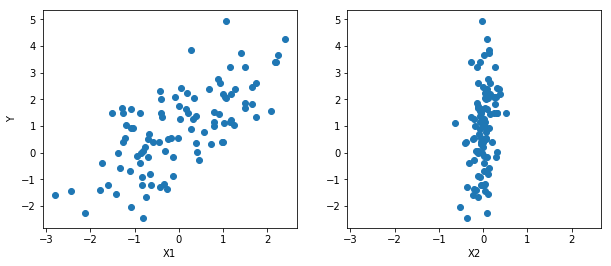

In [4]:
%matplotlib inline

fig, axes = plt.subplots(1,2,sharex=True,figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [5]:
basic_model = pm.Model()

with basic_model:
    #priors
    alpha = pm.Normal('alpha',mu=0, sd=10)
    beta = pm.Normal('beta',mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma',sd=1)
    
    #expected value, the parameter mu
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    #likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs',mu=mu,sd=sigma,observed=Y)

In [9]:
with basic_model:
    
    #initial MAP
    start = pm.find_MAP()
    
    #MCMC algo
    step = pm.Metropolis()
    
    #sample from posterior
    trace = pm.sample(500,step=step,start=start)


logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 2481.76it/s]  
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma_log__]
>Metropolis: [beta]
>Metropolis: [alpha]
100%|██████████| 1000/1000 [00:00<00:00, 2741.28it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


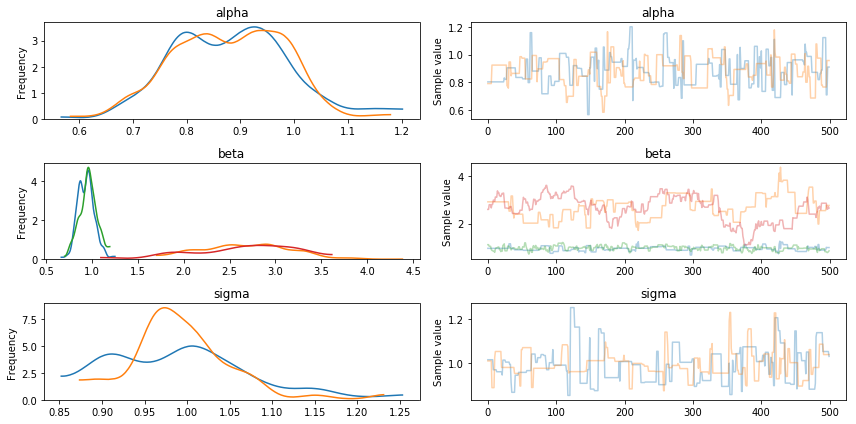

In [10]:
_ = pm.traceplot(trace)

array([0.91413563, 0.99144543, 0.86701888, 0.97633555, 0.97407124])